In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!python -m pip install oaklib


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [3]:
# node.js needs to be at least version 12 or so for OAK
!node --version

v16.18.0


In [4]:
# Files
old_scores = 'https://kg-hub.berkeleybop.io/frozen_incoming_data/hp-mp-phenodigm-cache.txt.gz'
new_scores = 'https://kg-hub.berkeleybop.io/kg-phenio/hp-mp_similarities.tar.gz'

old_tar_file = 'hp-mp-phenodigm-cache.txt.gz'
new_tar_file = 'hp-mp_similarities.tar.gz'

old_sim_file = 'hp-mp-phenodigm-cache.txt'
new_sim_file = 'KGPhenio_similarities'

In [ ]:
!wget {old_scores}
!gunzip {old_tar_file}

!wget {new_scores}
!tar -xvzf {new_tar_file}

In [5]:
!ls

KGPhenio_similarities
hp-mp-phenodigm-cache.txt
hp-mp-phenodigm-cache.txt.gz
hp-mp-phenodigm-cache.txt.gz.1
hp-mp_similarities.tar.gz
hp-mp_similarities.tar.gz.1
hp-mp_similarities.tar.gz.2
plot_old_versus_new_phenodigm_resnik_and_jaccard.ipynb


In [6]:
old_sim_pd = pd.read_csv(old_sim_file, sep="\t", header=None)
mapping = {old_sim_pd.columns[0]:'source_old',
           old_sim_pd.columns[1]: 'destination_old', 
           old_sim_pd.columns[2]: 'jaccard_old',            
           old_sim_pd.columns[3]: 'resnik_score_old',
           old_sim_pd.columns[4]: 'subsumer_old',
           }
old_sim_pd = old_sim_pd.rename(columns=mapping)

old_sim_pd['source_old'] = old_sim_pd['source_old'].str.replace('_',':')
old_sim_pd['destination_old'] = old_sim_pd['destination_old'].str.replace('_',':')

old_sim_pd

,source_old,destination_old,jaccard_old,resnik_score_old,subsumer_old
0,HP:0000033,MP:0004014,0.470588,2.659134,MP_0002160;
1,HP:0000033,MP:0020998,0.434783,3.300796,MP_0009198;
2,HP:0000033,MP:0020957,0.363636,2.659134,MP_0002160;
3,HP:0000033,MP:0020869,0.212766,3.300796,MP_0009198;
4,HP:0000033,MP:0020824,0.500000,3.300796,MP_0009198;
...,...,...,...,...,...
13033730,HP:0008609,MP:0004176,0.243243,5.040392,HP_0031703;
13033731,HP:0008609,MP:0030154,0.928571,7.560589,MP_0000049;
13033732,HP:0008609,MP:0030155,0.866667,7.560589,MP_0000049;
13033733,HP:0008609,MP:0030156,0.650000,7.560589,MP_0000049;


In [ ]:
old_sim_pd['jaccard_old'].plot(kind='hist', xlim=0)

In [ ]:
old_sim_pd['resnik_score_old'].plot(kind='hist', bins=15, xlim=0)

In [7]:
new_sim_pd = pd.read_csv(new_sim_file, sep=",")
new_sim_pd

,source,destination,resnik_score,jaccard
0,MP:3000005,MP:3000005,14.526168,1.000000
1,HP:0030350,HP:0030350,14.526168,1.000000
2,MP:0008925,MP:0008925,14.526168,1.000000
3,MP:0008926,MP:0008926,14.526168,1.000000
4,MP:0008926,MP:0013185,14.526168,0.857143
...,...,...,...,...
51383633,HP:0001802,HP:0200054,5.041991,0.214286
51383634,HP:0100142,MP:0009001,5.041991,0.117647
51383635,HP:0010388,MP:0009001,5.041991,0.133333
51383636,HP:0010323,HP:0001802,5.041991,0.214286


In [ ]:
new_sim_pd['jaccard'].plot(kind='hist', xlim=0)

In [ ]:
new_sim_pd['resnik_score'].plot(kind='hist', bins=15, xlim=0)

In [8]:
intersected_scores1 = old_sim_pd.merge(new_sim_pd, how='inner',
                                      left_on=['source_old', 'destination_old'], right_on=['source', 'destination'])
intersected_scores2 = old_sim_pd.merge(new_sim_pd, how='inner',
                                      left_on=['source_old', 'destination_old'], right_on=['destination', 'source'])
intersected_scores = pd.concat([intersected_scores1, intersected_scores2])
intersected_scores

,source_old,destination_old,jaccard_old,resnik_score_old,subsumer_old,source,destination,resnik_score,jaccard
0,HP:0000033,MP:0004014,0.470588,2.659134,MP_0002160;,HP:0000033,MP:0004014,5.358735,0.153846
1,HP:0000033,MP:0020998,0.434783,3.300796,MP_0009198;,HP:0000033,MP:0020998,7.041238,0.166667
2,HP:0000033,MP:0020957,0.363636,2.659134,MP_0002160;,HP:0000033,MP:0020957,7.038994,0.153846
3,HP:0000033,MP:0020824,0.500000,3.300796,MP_0009198;,HP:0000033,MP:0020824,6.481542,0.363636
4,HP:0000033,MP:0002771,0.400000,3.300796,MP_0009198;,HP:0000033,MP:0002771,7.041238,0.153846
...,...,...,...,...,...,...,...,...,...
2361470,HP:0008609,MP:0004204,0.500000,7.560589,MP_0000049;,MP:0004204,HP:0008609,10.195435,0.230769
2361471,HP:0008609,MP:0030154,0.928571,7.560589,MP_0000049;,MP:0030154,HP:0008609,10.195435,0.272727
2361472,HP:0008609,MP:0030155,0.866667,7.560589,MP_0000049;,MP:0030155,HP:0008609,10.195435,0.250000
2361473,HP:0008609,MP:0030156,0.650000,7.560589,MP_0000049;,MP:0030156,HP:0008609,10.195435,0.272727


In [ ]:
ax1 = intersected_scores.plot.scatter(x='resnik_score',
                                      y='resnik_score_old',
                                      c='DarkBlue',
                                      s=0.01
                                     )

In [ ]:
ax1 = intersected_scores.plot.scatter(x='jaccard',
                                      y='jaccard_old',
                                      c='DarkBlue',
                                      s=0.01
                                     )

### Which pairs have high scores in the old set and low scores in the new set?

In [9]:
intersected_scores['resnik_diff'] = intersected_scores['resnik_score_old'] - intersected_scores['resnik_score']
intersected_scores.sort_values(by='resnik_diff', ascending=False, inplace=True)
intersected_scores

,source_old,destination_old,jaccard_old,resnik_score_old,subsumer_old,source,destination,resnik_score,jaccard,resnik_diff
962688,HP:0002607,MP:0003281,1.000000,14.359005,MP_0003281;,HP:0002607,MP:0003281,5.159422,0.300000,9.199583
632818,HP:0040183,MP:0003281,0.944444,14.359005,MP_0003281;,HP:0040183,MP:0003281,5.159422,0.272727,9.199583
1327215,HP:0012700,MP:0003281,0.529412,14.351005,HP_0012700;,HP:0012700,MP:0003281,5.159422,0.333333,9.191583
1326917,HP:0012701,MP:0003281,0.500000,14.351005,HP_0012700;,HP:0012701,MP:0003281,5.159422,0.300000,9.191583
878712,HP:0012700,MP:0003281,0.529412,14.351005,HP_0012700;,MP:0003281,HP:0012700,5.159422,0.333333,9.191583
...,...,...,...,...,...,...,...,...,...,...
1071039,HP:0410188,MP:0005562,0.282051,2.508834,MP_0008469;,HP:0410188,MP:0005562,13.139874,0.300000,-10.631039
728809,HP:0410198,MP:0005562,0.321429,2.508834,MP_0008469;,MP:0005562,HP:0410198,13.139874,0.300000,-10.631039
1069220,HP:0410198,MP:0005562,0.321429,2.508834,MP_0008469;,HP:0410198,MP:0005562,13.139874,0.300000,-10.631039
2020913,HP:0002553,MP:0003761,0.222222,2.512377,HP_0000271;,HP:0002553,MP:0003761,13.833021,0.153846,-11.320644


<AxesSubplot: ylabel='Frequency'>

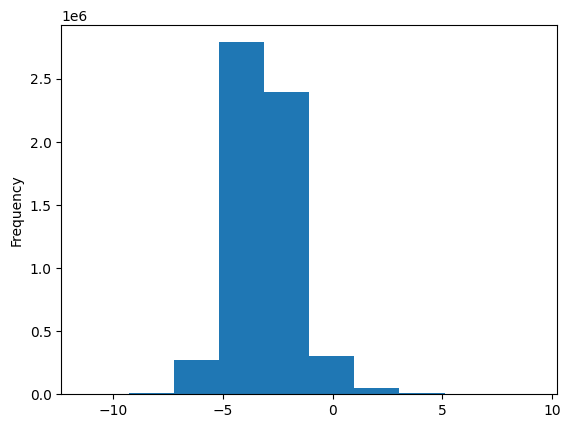

In [27]:
intersected_scores['resnik_diff'].plot(kind='hist')

<AxesSubplot: >

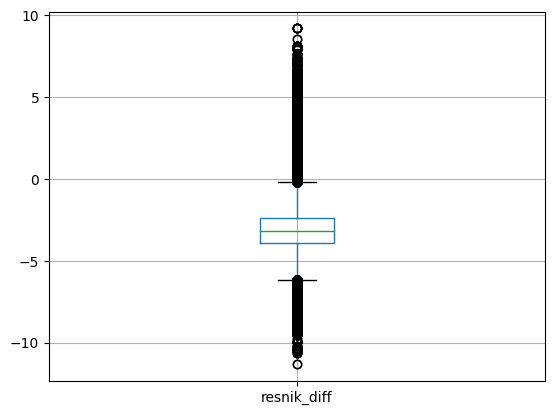

In [39]:
intersected_scores.boxplot(column='resnik_diff')

In [37]:
# Find pairs +/- 1.5 iqr
q3 = np.quantile(intersected_scores['resnik_diff'], 0.75)
q1 = np.quantile(intersected_scores['resnik_diff'], 0.25)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
(lower, upper)

(-6.1562406229018185, -0.16051698226410993)

In [43]:
# Get pairs outside that range (lower than the lower bound, higher than the higher bound)
intersected_scores[(intersected_scores['resnik_diff'] <= lower) | (intersected_scores['resnik_diff'] >= upper)]

,source_old,destination_old,jaccard_old,resnik_score_old,subsumer_old,source,destination,resnik_score,jaccard,resnik_diff
962688,HP:0002607,MP:0003281,1.000000,14.359005,MP_0003281;,HP:0002607,MP:0003281,5.159422,0.300000,9.199583
632818,HP:0040183,MP:0003281,0.944444,14.359005,MP_0003281;,HP:0040183,MP:0003281,5.159422,0.272727,9.199583
1327215,HP:0012700,MP:0003281,0.529412,14.351005,HP_0012700;,HP:0012700,MP:0003281,5.159422,0.333333,9.191583
1326917,HP:0012701,MP:0003281,0.500000,14.351005,HP_0012700;,HP:0012701,MP:0003281,5.159422,0.300000,9.191583
878712,HP:0012700,MP:0003281,0.529412,14.351005,HP_0012700;,MP:0003281,HP:0012700,5.159422,0.333333,9.191583
...,...,...,...,...,...,...,...,...,...,...
1071039,HP:0410188,MP:0005562,0.282051,2.508834,MP_0008469;,HP:0410188,MP:0005562,13.139874,0.300000,-10.631039
728809,HP:0410198,MP:0005562,0.321429,2.508834,MP_0008469;,MP:0005562,HP:0410198,13.139874,0.300000,-10.631039
1069220,HP:0410198,MP:0005562,0.321429,2.508834,MP_0008469;,HP:0410198,MP:0005562,13.139874,0.300000,-10.631039
2020913,HP:0002553,MP:0003761,0.222222,2.512377,HP_0000271;,HP:0002553,MP:0003761,13.833021,0.153846,-11.320644


In [52]:
intersected_scores[(intersected_scores['resnik_diff'] <= lower)]

,source_old,destination_old,jaccard_old,resnik_score_old,subsumer_old,source,destination,resnik_score,jaccard,resnik_diff
1216781,HP:0033694,MP:0009749,0.727273,3.111188,ZP_0140321;,MP:0009749,HP:0033694,9.268673,0.272727,-6.157485
1216767,HP:0033694,MP:0001363,0.583333,3.111188,ZP_0140321;,MP:0001363,HP:0033694,9.268673,0.300000,-6.157485
1216768,HP:0033694,MP:0001358,0.583333,3.111188,ZP_0140321;,MP:0001358,HP:0033694,9.268673,0.272727,-6.157485
778863,HP:0002367,MP:0002863,0.437500,3.111188,ZP_0140321;,HP:0002367,MP:0002863,9.268673,0.272727,-6.157485
1216748,HP:0033694,MP:0003459,0.608696,3.111188,ZP_0140321;,MP:0003459,HP:0033694,9.268673,0.300000,-6.157485
...,...,...,...,...,...,...,...,...,...,...
1071039,HP:0410188,MP:0005562,0.282051,2.508834,MP_0008469;,HP:0410188,MP:0005562,13.139874,0.300000,-10.631039
728809,HP:0410198,MP:0005562,0.321429,2.508834,MP_0008469;,MP:0005562,HP:0410198,13.139874,0.300000,-10.631039
1069220,HP:0410198,MP:0005562,0.321429,2.508834,MP_0008469;,HP:0410198,MP:0005562,13.139874,0.300000,-10.631039
2020913,HP:0002553,MP:0003761,0.222222,2.512377,HP_0000271;,HP:0002553,MP:0003761,13.833021,0.153846,-11.320644


Overall, most pairs have higher Resnik similarity with new methods than with older ones. More than 211 thousand pairs meet our cutoff.

The top 5 differences in Resnik score are for pairs involving MP:0003281 (fecal incontinence). The top HP hit in the old scores is for HP:0002607 (bowel incontinence) and even includes the synonym "Fecal incontinence", so that appears to be a very good match. The low score in the new set may reflect how the ancestors of these terms are otherwise dissimilar: 
In HP, it looks like
```
All
 Phenotypic abnormality
  Abnormality of the digestive system
   Abnormality of digestive system physiology
    Abnormal large intestine physiology
     Bowel incontinence
  Constitutional symptom
   Impairment of activities of daily living
    Impaired continence
     Bowel incontinence
```
While in MP, we have
```
mammalian phenotype
 digestive/alimentary phenotype
  abnormal digestive system physiology
   abnormal defecation
    fecal incontinence
```

The other HP terms in this top 5 are HP:0040183 (Encopresis; a child of HP:0002607), HP:0012700 (Abnormal large intestine physiology; see above), HP:0012701 (Bowel urgency; a child of HP:0012700), and HP:0012700 (that's a duplicate - shouldn't be there).

The *lowest* differences (i.e., the pairs where Resnik was previously very low and is now very high) involve HP:0410188 (Decreased glucose-6-phosphate dehydrogenase level in red blood cells), MP:0005562 (decreased mean corpuscular hemoglobin),  HP:0002553 (Highly arched eyebrow), and MP:0003761 (arched palate). Several of these are duplicates. In the latter pair, the lexical similarity of "arched" is a clue, as the path between these terms involves UPHENO:0041110 (arched anatomical entity). Related to PATO:0001594 (arched), this term is useful for describing a type of similarity but isn't meaningful for phenotype similarity, at least in this case. For the former pair of HP:0410188 vs MP:0005562, the phenotypes appear similar on the basis of involving blood. The path between them crosses through UPHENO:0034498 (decreased level of chemical entity in erythrocyte)

In [45]:
# Let's see a few more of those pairs.
intersected_scores.tail(20)

,source_old,destination_old,jaccard_old,resnik_score_old,subsumer_old,source,destination,resnik_score,jaccard,resnik_diff
2173441,HP:0004660,MP:0003359,0.380952,3.540237,MP_0002108;,MP:0003359,HP:0004660,13.833021,0.181818,-10.292784
3196140,HP:0004660,MP:0003359,0.380952,3.540237,MP_0002108;,HP:0004660,MP:0003359,13.833021,0.181818,-10.292784
639919,HP:0002684,MP:0030278,0.590909,2.516983,HP_0000929;,MP:0030278,HP:0002684,12.916730,0.230769,-10.399747
856586,HP:0009746,MP:0030278,0.454545,2.516983,HP_0000929;,MP:0030278,HP:0009746,12.916730,0.214286,-10.399747
1293313,HP:0009746,MP:0030278,0.454545,2.516983,HP_0000929;,HP:0009746,MP:0030278,12.916730,0.214286,-10.399747
639878,HP:0002684,MP:0030376,0.433333,2.516983,HP_0000929;,MP:0030376,HP:0002684,12.916730,0.230769,-10.399747
950261,HP:0002684,MP:0030278,0.590909,2.516983,HP_0000929;,HP:0002684,MP:0030278,12.916730,0.230769,-10.399747
950221,HP:0002684,MP:0030376,0.433333,2.516983,HP_0000929;,HP:0002684,MP:0030376,12.916730,0.230769,-10.399747
955557,HP:0006611,MP:0010869,0.409091,3.364452,MP_0003795;,MP:0010869,HP:0006611,13.833021,0.250000,-10.468569
1441985,HP:0006611,MP:0010869,0.409091,3.364452,MP_0003795;,HP:0006611,MP:0010869,13.833021,0.250000,-10.468569


HP:0002227 (White eyelashes) vs MP:0006242 (white pupil) is a pair with physical similarity in both anatomy and attribute. It has a relatively high score of 13.427556 in the new method, as does HP:0002226 (White eyebrow).

HP:0006611 (Decreased number of sternal ossification centers) vs MP:0010869 (decreased bone trabecula number): both involve bone, certainly, though the high similarity score may be misrepresenting what is otherwise a dissimilar phenotype.

## OAK and Graph viz

Time to visualize, courtesy of OAK, obographviz, and KG-Phenio.

In [11]:
# Set up the alias first for notebook purposes
%alias phenio runoak -i sqlite:obo:phenio

In [51]:
phenio info UPHENO:0034969

UPHENO:0034969 ! abnormally decreased number of anatomical entity in the bone element


In [50]:
phenio viz -p i,p "HP:0006611" "MP:0010869" -o output2.png --no-view